In [ ]:
#1. Why is Feature Scaling Very Very important
- Helps bring uniformity
- Faster processing

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
df = sns.load_dataset("titanic")

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df = df[["survived",'pclass','sex','age','sibsp',	'parch',	'fare']]

In [ ]:
df['sex'] = (df['sex'] == 'female').astype(int) #Female = 1, male =0

In [ ]:
df.head() #Y - Prediction Column, Labels , Target Column, Y

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [ ]:
X = df.drop('survived',axis = 1).astype(float).values
y = df['survived'].astype(int).values

Object `drop` not found.


In [ ]:
X[0]-X[1]

array([  2.    ,  -1.    , -16.    ,   0.    ,   0.    , -64.0333])

In [ ]:
y[0]

np.int64(0)

In [ ]:
#Criterias

#Surviving Criteria - Some Columns whey more.. #Value Semantic Distance wrt Surviving criteria
#Non-Surviving Criteria - #Semantic Distance wrt non-surviving criterias

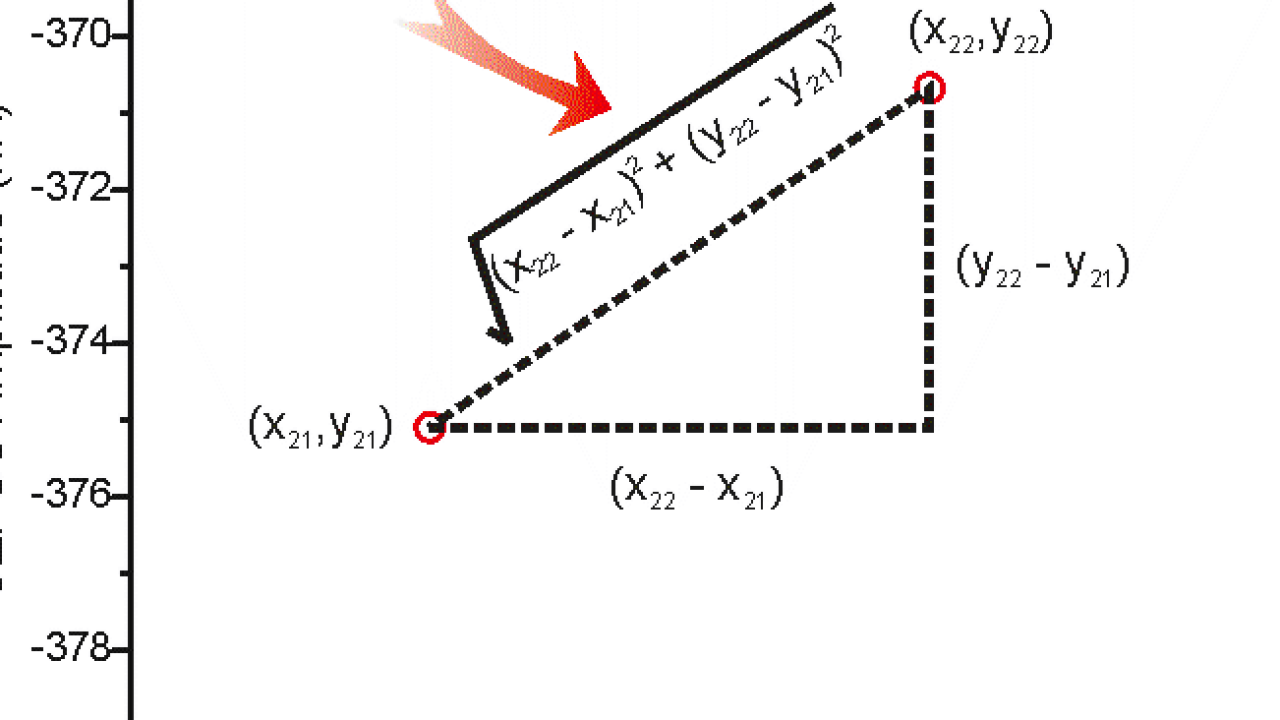

In [ ]:
def euclidean(u,v): return float(np.linalg.norm(u-v))

In [ ]:
base = X[0].copy()

In [ ]:
euclidean(X[0], X[0])

0.0

In [ ]:
euclidean(X[0], X[4])

13.062924634246345

In [ ]:
euclidean(X[0], X[2])

4.296001047485906

In [ ]:
def tweak(row, **chg):
  r = row.copy()
  idx = {n:i for i,n in enumerate(['pclass','sex','age','sibsp',	'parch',	'fare'])}
  for k,v in chg.items():
    r[idx[k]] = r[idx[k]] + v
  return r

In [52]:
v_age = tweak(base,age=+2)
v_fare = tweak(base,fare=+10)
v_sibsp = tweak(base,sibsp=+1)
v_pclass = tweak(base,pclass=+1)
v_small = tweak(base, age=+1, fare=+1)

In [53]:
raw_samples = np.vstack([base,v_age,v_fare,v_sibsp, v_small])
name = ['base','age+2','fare+10','sibsp+1','Pclass+1','age-1|Fare-1']

In [54]:
rows = []
for name, vec in zip(name[1:],raw_samples[1:]):
  rows.append({
      "Pair": f"base->{name}",
      "Euclidean":euclidean(base,vec)},)

raw_dist_df = pd.DataFrame(rows, columns = ["Pair",'Euclidean'])

In [55]:
raw_dist_df

,Pair,Euclidean
0,base->age+2,2.000000
1,base->fare+10,10.000000
2,base->sibsp+1,1.000000
3,base->Pclass+1,1.414214


In [56]:
pairs = raw_dist_df["Pair"].tolist()
eu = raw_dist_df['Euclidean'].tolist()

([<matplotlib.axis.XTick at 0x7c3a69d53440>,
 [Text(0, 0, 'base->age+2'),
  Text(1, 0, 'base->fare+10'),
  Text(2, 0, 'base->sibsp+1'),
  Text(3, 0, 'base->Pclass+1')])

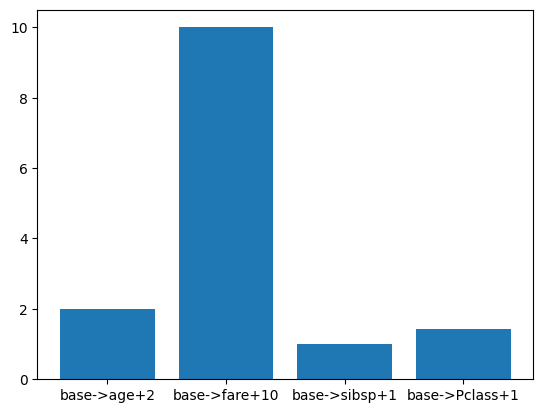

In [57]:
import matplotlib.pyplot as plt

plt.figure()
x = np.arange(len(pairs))
plt.bar(x,eu)
plt.xticks(x,pairs,)

In [65]:
#Z-Score #Feature Scaling methods
#Normalization..
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
base_z = scaler.transform([base])[0]
name = ['base','age+2','fare+10','sibsp+1','Pclass+1','age-1|Fare-1']
sampZ = scaler.transform(raw_samples)
rows = []
for name, vec_z in zip(name[1:],sampZ[1:]):
  rows.append({
      "Pair": f"base->{name}",
      "Euclidean":euclidean(base_z,vec_z)},)

scaled_dist_df = pd.DataFrame(rows, columns = ["Pair",'Euclidean'])
scaled_dist_df

,Pair,Euclidean
0,base->age+2,0.137776
1,base->fare+10,0.201347
2,base->sibsp+1,0.907339
3,base->Pclass+1,0.071770


In [66]:
pairs = scaled_dist_df["Pair"].tolist()
eu = scaled_dist_df['Euclidean'].tolist()

([<matplotlib.axis.XTick at 0x7c3a659721e0>,
 [Text(0, 0, 'base->age+2'),
  Text(1, 0, 'base->fare+10'),
  Text(2, 0, 'base->sibsp+1'),
  Text(3, 0, 'base->Pclass+1')])

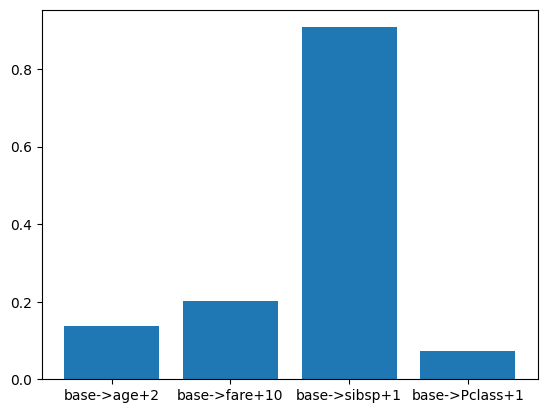

In [67]:
import matplotlib.pyplot as plt

plt.figure()
x = np.arange(len(pairs))
plt.bar(x,eu)
plt.xticks(x,pairs,)

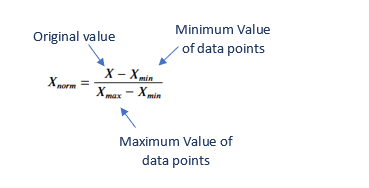

In [71]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler().fit(X)

base_mm = mm.transform([base])[0]
samp_mm = mm.transform(raw_samples)
name = ['base','age+2','fare+10','sibsp+1','Pclass+1','age-1|Fare-1']

rows = []
for name, vec_mm in zip(name[1:],samp_mm[1:]):
  rows.append({
      "Pair": f"base->{name}",
      "Euclidean":euclidean(base_mm,vec_mm)},)

scaled_dist_df = pd.DataFrame(rows, columns = ["Pair",'Euclidean'])
scaled_dist_df

,Pair,Euclidean
0,base->age+2,0.025132
1,base->fare+10,0.019519
2,base->sibsp+1,0.125000
3,base->Pclass+1,0.012717


In [72]:
pairs = scaled_dist_df["Pair"].tolist()
eu = scaled_dist_df['Euclidean'].tolist()

([<matplotlib.axis.XTick at 0x7c3a657443b0>,
 [Text(0, 0, 'base->age+2'),
  Text(1, 0, 'base->fare+10'),
  Text(2, 0, 'base->sibsp+1'),
  Text(3, 0, 'base->Pclass+1')])

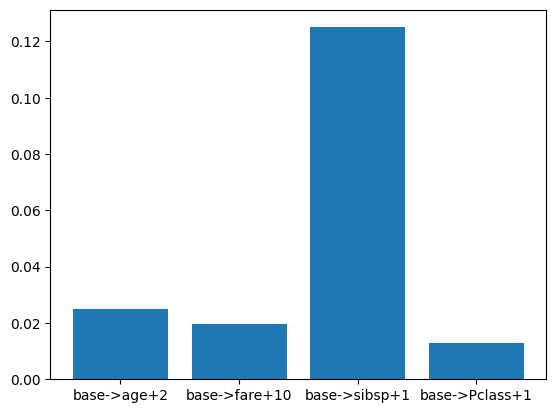

In [73]:
import matplotlib.pyplot as plt

plt.figure()
x = np.arange(len(pairs))
plt.bar(x,eu)
plt.xticks(x,pairs,)

Q1. Why did the raw euclidean distance over emphasize that fare+10 change?
Because "Fare" has a much larger numeric range than features like 'gender' or 'pclass'. In raw eucledian space, larger-magnitude of columns dominate.

In [ ]:
#Distance measures - HomeWork
1. Manhattan distance
2. Cosine Similarity

In [ ]:
1,2,3,4,5,6,10

When to use Min-Max scaler
1. Want all the variable values to have a strict [0-1] or [-1to1]

Z-scores
1. Works well for algorithms that are sensitive to variance and distributiin
Only drawback is it doesnt not bound values